In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

f, d, D, z, kx = symbols('f,d,D,Z, K_x')
z = symbols('Z')
Delta = Symbol("Delta")
eq_right = Delta * z
eq_left = Abs(1/d-1/(d+Delta*d))*f*D*kx
Eq(eq_right, eq_left)

Eq(Delta*Z, D*K_x*f*Abs(1/(Delta*d + d) - 1/d))

(2048,)
[3.36009555e+00 1.34403822e+00 7.46687899e-01 ... 3.20600378e-06
                 3.20287445e-06 3.19974969e-06]                 


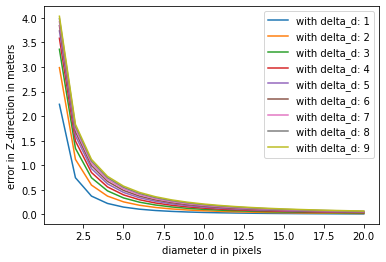

In [75]:
# intrinsics: [1137.952358814274, 1139.2455706836256, 1040.2907098789112, 764.4019425366827]
# resolution: [2048, 1536]
# assuming that first entry of intrinsics is the kx parameter [pixels/inches]

# error for given measured diameter d on image plane in meters
def error_function(d, delta_d):
    delta_Z = D*f*kx*abs(1/(d+delta_d) - 1/d)*10**(-3)
    return delta_Z

kx = 1137.952358814274/ 2.54  # to make it [pixels/cm]
num_of_samples = 2048
d_d = 3
f = 1
D = 10
# d is diameter of ball in pixels (only integer numbers)
d = np.linspace(1, 2048, num_of_samples, endpoint=True)
delta_Z = error_function(d, d_d)

print(delta_Z.shape)

pprint(delta_Z)

for delta_d in range(1,10):
    delta_Z = error_function(d[:20], delta_d)
    plt.plot(d[:20], delta_Z, label='with delta_d: {}'.format(delta_d))

    
plt.xlabel('diameter d in pixels')
plt.ylabel('error in Z-direction in meters')
plt.legend()
plt.show()
